# Section 1

## 1) The first thing we need to do is understand the company profiles we are dealing with:

### a)	How many Companies were incorporated in each year?!

In [19]:
%matplotlib inline
import pandas as pd

In [2]:
df1 = pd.read_csv('test_Sample.csv')

In [3]:
df1.head()


,REG,NAME,INC,SIC07,SIC03,LIQ,ARD,ACCFIL,ACCLAT,ACCDUE
0,5195331,PEAK BOX DESIGNS LIMITED,02/08/2004,23990.0,2682.0,L,02/08/2005,09/11/2006,30/09/2005,30/06/2007
1,8863855,PEARSE CALLAGHAN LIMITED,28/01/2014,70229.0,7414.0,NaN,28/01/2018,27/11/2017,31/01/2017,31/10/2018
2,3891648,ALUN DAVIES LIMITED,09/12/1999,41100.0,7011.0,NaN,09/12/2017,01/09/2017,31/03/2017,31/12/2018
3,6746666,SCOT-TEC OIL SERVICES LTD,11/11/2008,96090.0,9305.0,NaN,11/11/2017,31/08/2017,30/11/2016,31/08/2018
4,NI067951,AVOCA CLOSE PROPERTY MANAGEMENT CO LTD,04/02/2008,70229.0,7414.0,NaN,04/02/2018,30/08/2017,28/02/2017,30/11/2018


Considering that each REG is a different company. Next step is to creat a new column with the 'INC years only

In [4]:
df1['year'] = pd.DatetimeIndex(df1['INC']).year
years = df1.groupby(['year'])['REG'].count()
years

year
1962     1
1972     1
1973     1
1978     1
1984     2
1986     1
1989     1
1990     1
1991     1
1997     1
1998     3
1999     2
2000     2
2001     1
2002     1
2003     2
2004     2
2005     5
2006     3
2007     1
2008     6
2009     8
2010     2
2011     6
2012     5
2013     7
2014    16
2015     7
2016    10
Name: REG, dtype: int64

In [5]:
df1.head()

,REG,NAME,INC,SIC07,SIC03,LIQ,ARD,ACCFIL,ACCLAT,ACCDUE,year
0,5195331,PEAK BOX DESIGNS LIMITED,02/08/2004,23990.0,2682.0,L,02/08/2005,09/11/2006,30/09/2005,30/06/2007,2004
1,8863855,PEARSE CALLAGHAN LIMITED,28/01/2014,70229.0,7414.0,NaN,28/01/2018,27/11/2017,31/01/2017,31/10/2018,2014
2,3891648,ALUN DAVIES LIMITED,09/12/1999,41100.0,7011.0,NaN,09/12/2017,01/09/2017,31/03/2017,31/12/2018,1999
3,6746666,SCOT-TEC OIL SERVICES LTD,11/11/2008,96090.0,9305.0,NaN,11/11/2017,31/08/2017,30/11/2016,31/08/2018,2008
4,NI067951,AVOCA CLOSE PROPERTY MANAGEMENT CO LTD,04/02/2008,70229.0,7414.0,NaN,04/02/2018,30/08/2017,28/02/2017,30/11/2018,2008


In [6]:
import matplotlib.pyplot as plt
plt.plot(years)
plt.show()

<Figure size 640x480 with 1 Axes>

### b) Comments about the finding


The number of companies incorporated has been exponentially increasing in the last years


## 2) It looks like some of the companies are in distress:

### a)	How many companies are in Liquidation? 

In [7]:
df1['LIQ'].count()


8

8 companies are on Liquidation processes


### b)	What is the average age of the companies in Liquidation? 

In [8]:
import datetime
now = datetime.datetime.now()
df1[['year','LIQ']]
df1['LIQ_Age'] = now.year - df1['year']
aux = df1[['year','LIQ_Age','LIQ']]
aux = aux.dropna()
aux.mean()

year       2003.875
LIQ_Age      14.125
dtype: float64

The average age of Liquidation is 14 years


##  3)	Using the SIC03 code, we can determine what industry each company is active in, for aggregation purposes, we are only interested in the first 2 digits of the code i.e. 2683 should be truncated to 26.!

### a)	Create a Distribution plot of the truncated SIC03 code !

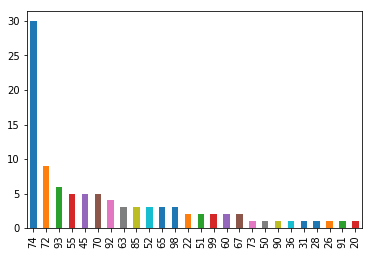

In [9]:

trunc = lambda x: int(str(x)[:2])
aux2 = df1.dropna(subset=['SIC03'])
aux2 = aux2['SIC03'].map(trunc)
aux2.value_counts().plot(kind= "bar")
plt.show()


# Section 2

## 1)	Identify the latest credit score for each company, by selecting the Credit rating for each company where the Order is 1 (which is the latest date), then output overview information about the rating, i.e count, mean, std, min, 25%, 50%, 75%, max!

In [10]:
df2 = pd.read_csv('Sample_CR.csv')
df2.head()

,REG,RATING,DATE,ORDER
0,729029,89,09/12/2017,1
1,729029,90,03/10/2017,2
2,729029,87,16/12/2016,3
3,729029,87,11/03/2016,4
4,729029,73,03/07/2015,5


In [11]:
aux3 = df2.loc[df2['ORDER'] == 1]
aux3.info()
aux3.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 1610
Data columns (total 4 columns):
REG       100 non-null object
RATING    100 non-null int64
DATE      100 non-null object
ORDER     100 non-null int64
dtypes: int64(2), object(2)
memory usage: 3.9+ KB


,REG,RATING,DATE,ORDER
0,729029,89,09/12/2017,1
29,1073098,59,27/09/2017,1
87,1113271,59,18/10/2017,1
108,1370343,-23,07/10/2015,1
148,1858007,49,29/12/2016,1
185,1870753,82,22/05/2017,1
201,2005811,80,02/08/2017,1
229,2505293,42,30/09/2017,1
263,2668478,96,27/09/2017,1
282,3301472,53,17/11/2017,1


In [12]:
aux3.describe()

,RATING,ORDER
count,100.000000,100.0
mean,42.600000,1.0
std,41.636474,0.0
min,-34.000000,1.0
25%,18.750000,1.0
50%,53.500000,1.0
75%,75.000000,1.0
max,96.000000,1.0


## 2)	Is there anything strange about any of the numbers?

I believe it is not suppose to exist negative ratings. 

## 3)	Select the current top ranked companies (clue there should be 6 of them, we are only interested in the top ranked where the order equals 1)

In [13]:
aux4 = aux3.sort_values(['RATING'], ascending=[0])
aux4.head(10)


,REG,RATING,DATE,ORDER
263,2668478,96,27/09/2017,1
1464,NI067951,96,02/09/2014,1
1323,9026703,96,31/12/2017,1
1242,8451055,96,27/12/2017,1
473,4025368,96,17/05/2017,1
450,3976447,96,30/12/2017,1
1173,8128453,95,26/04/2018,1
1399,9929815,95,23/03/2018,1
1610,SC497589,95,11/12/2017,1
1551,SC244210,94,15/08/2017,1


In [14]:
aux4.loc[aux4['RATING'] == max(aux4['RATING'])]

,REG,RATING,DATE,ORDER
263,2668478,96,27/09/2017,1
1464,NI067951,96,02/09/2014,1
1323,9026703,96,31/12/2017,1
1242,8451055,96,27/12/2017,1
473,4025368,96,17/05/2017,1
450,3976447,96,30/12/2017,1


## 4)	Create a time series of each company so you can identify the trend of the companies credit rating over time.

In [15]:
aux5 = df2[['REG','DATE', 'RATING']]

aux5.head(15)
#Plot on same graph the ts of each company, where each company has a colour 
#x axis is the Date column
#y axis the Rating

,REG,DATE,RATING
0,729029,09/12/2017,89
1,729029,03/10/2017,90
2,729029,16/12/2016,87
3,729029,11/03/2016,87
4,729029,03/07/2015,73
5,729029,24/03/2015,71
6,729029,03/09/2014,56
7,729029,24/08/2014,49
8,729029,10/02/2014,78
9,729029,19/11/2013,67


/Users/tiagocabo/anaconda3/envs/Py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


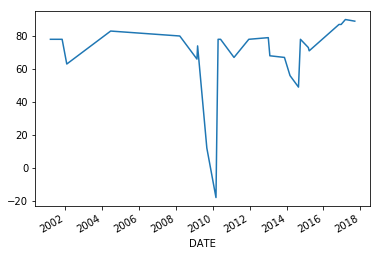

In [16]:

aux6 = aux5.loc[aux5['REG'] == '729029']

aux6['DATE'] = pd.to_datetime(aux6['DATE'])
aux6.set_index('DATE', inplace=True)
aux6['RATING'].plot()

In [17]:
Reglist = aux3['REG']
output = False

/Users/tiagocabo/anaconda3/envs/Py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


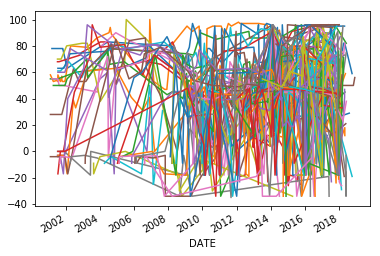

In [18]:

for i in Reglist:
    aux6 = aux5.loc[aux5['REG'] == i]
    aux6['DATE'] = pd.to_datetime(aux6['DATE'])
    aux6.set_index('DATE', inplace=True)
    aux6['RATING'].plot()